# Part II - Ford GoBike System Data Analysis
#### by Nanli

## Investigation Overview

The goal of the presentation is to explore the Ford GoBike System dataset and discover the temporal and spatial trend of bike riding habits in the San Francisco Bay area. I would like to demonstrate my findings following the summary below.

**1. Temporal Analysis**

The number of rides by hours and by day of the weeks have clear temporal trends, subscribers use GoBike System mainly for commuting purposes, while normal users use bikes both for work and for casual reasons. 

**2. Spatial Analysis**

The busiest start and end stations are San Francisco Caltrain Station 2, Montgomery St BART Station, Market St at 10th St, etc. San Francisco Caltrain Station 2 is close to residential areas, and Montgomery St BART Station is close to office areas.

**3. Duration and Distance**

Riding durations and distances are not very much related to member demographics. However, the duration and distance are positively linear related.  


## Dataset Overview

I conducted preliminary data wrangling on the original dataset, and eventualy the 21 data columns I used are:

1.	duration_sec
2.	start_time
3.	end_time
4.	start_station_id
5.	start_station_name
6.	start_station_latitude
7.	start_station_longitude
8.	end_station_id
9.	end_station_name
10.	end_station_latitude
11.	end_station_longitude
12.	bike_id
13.	user_type
14.	member_birth_year
15.	member_gender
16.	bike_share_for_all_trip


**New Features from Feature Engineering**

17.	dow (day of the week)
18.	hour
19.	duration_min
20.	distance
21.	member_age

There are 183,412 rides in the dataset, and it contains one-month rides from 2019-02-01 to 2019-02-28.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(sns.set_style('dark'))
sns.set_palette('Paired')
plt.style.use('ggplot')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike_clean.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dow,hour,duration_min,distance,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thursday,17,869.75,0.54,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,Thursday,18,708.68,1.74,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,12,1030.90,2.70,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thursday,17,608.17,0.26,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thursday,23,26.42,2.41,45.0


## Temporal Analysis

**People use the Ford GoBike System mainly for commuting purposes.**

From the number of rides by day of the week, there are more rides during weekdays, I guess in San Francisco Bay area, people use shared bikes for work quite often, while during weekends, the number of rides decreases. 
 
The peak hours are during morning office time 7 am to 9 am, and after work time 4 pm to 6 pm, at 8 am and 5 pm the number of rides per hour reaches the highest points. Between 10 am to 3 pm, the number of bike riders is very steady, and after 6 pm, the number decreased hour by hour till midnight.


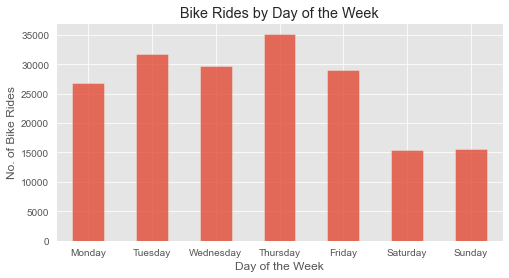

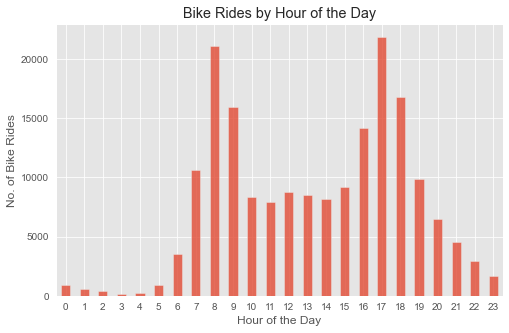

In [3]:
# barplot for dow
# order day of the week
ordinal_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_cnt = df['dow'].value_counts().reindex(ordinal_week)

plt.figure(figsize=(8,4))

dow_cnt.plot(kind='bar', alpha=0.8)
plt.title('Bike Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('No. of Bike Rides')
plt.xticks(rotation=360);


#barplot for hour of the day
hour_cnt = df['hour'].value_counts().sort_index()

plt.figure(figsize=(8,5))

hour_cnt.plot(kind='bar', alpha=0.8)
plt.title('Bike Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('No. of Bike Rides')
plt.xticks(rotation=360);

## Temporal Analysis by User Types

**Subscribers ride bikes mainly during weekdays, while normal customers also ride during the weekend.**

The subscribers mainly use bikes for commuting, there are few rides during off-peak hours on weekdays and the whole day during weekends.

Normal customers use bikes for commuting purposes as well, more of the ride during off-peak hours on weekdays compared with subscribers, while during weekends, there are quite a lot of customers ride shared bikes.

In [4]:
df_temporal = df.groupby(['user_type', 'dow', 'hour'])['bike_id'].size().to_frame().reset_index()
ordinal_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_temporal['dow'] = pd.Categorical(df_temporal['dow'], 
                                    categories=ordinal_week, 
                                    ordered=True)

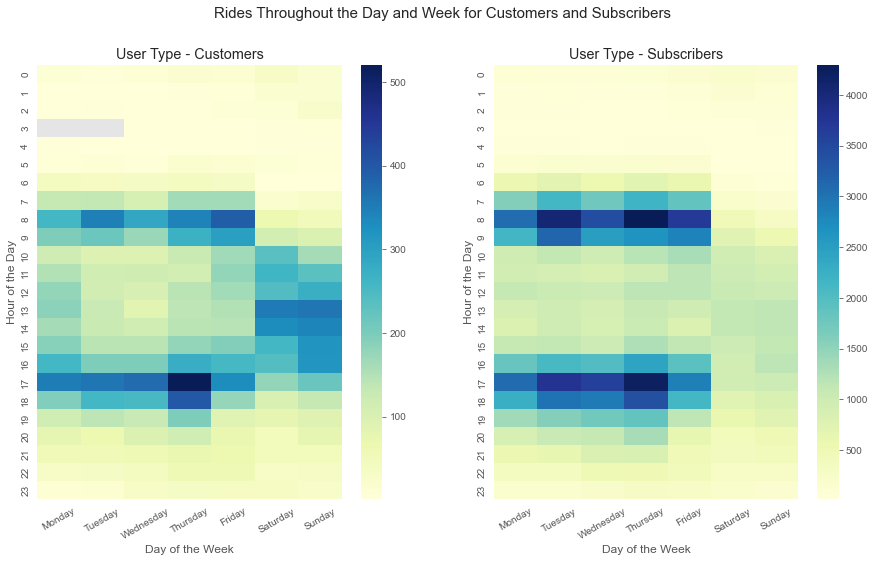

In [5]:
# subplots for rides during the day and weeks for customers and subscribers
fig, ax = plt.subplots(ncols=2, figsize=(15, 8))

sns.heatmap(data=df_temporal.loc[df_temporal.user_type=='Customer'].pivot('hour', 'dow', 'bike_id'), 
            cmap='YlGnBu', ax=ax[0])
sns.heatmap(data=df_temporal.loc[df_temporal.user_type=='Subscriber'].pivot('hour', 'dow', 'bike_id'), 
            cmap='YlGnBu', ax=ax[1])


ax[0].set_xlabel('Day of the Week')
ax[1].set_xlabel('Day of the Week')
ax[0].set_ylabel('Hour of the Day')
ax[1].set_ylabel('Hour of the Day')
ax[0].set_title('User Type - Customers')
ax[1].set_title('User Type - Subscribers')

ax[0].tick_params(axis='x', rotation=30)
ax[1].tick_params(axis='x', rotation=30)

fig.suptitle('Rides Throughout the Day and Week for Customers and Subscribers', fontsize=15);

## Spatial Analysis

**Bike Stations Insights**

1. San Francisco Caltrain Station 2 is the busiest station on weekdays in the mornings for the start station and the afternoons for the end station. 

2. Montgomery St BART Station is a popular end station in the mornings during weekdays.

3. *Assumptions*: San Francisco Caltrain Station 2 is close to residential areas, and Montgomery St BART Station is close to office areas.

4. Powell St BART Station and Market St at 10th Street are relatively busy during the weekend.

In [6]:
start_st = df['start_station_name'].value_counts()
end_st = df['end_station_name'].value_counts()

start_order = start_st.index.to_list()[0:5]
end_order = end_st.index.to_list()[0:5]

# bin edges that will be used to define member age group
bin_edges = [-1, 12, 18, 23] 
# labels
bin_names = ['Morning', 'Afternoon', 'Evening']
pd.options.mode.chained_assignment = None  # default='warn'
df['hour_label'] = pd.cut(df['hour'], bin_edges, labels=bin_names)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dow,hour,duration_min,distance,member_age,hour_label
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,17,869.75,0.54,35.0,Afternoon
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,Thursday,18,708.68,1.74,NaN,Afternoon
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,12,1030.90,2.70,47.0,Morning
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Thursday,17,608.17,0.26,30.0,Afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Thursday,23,26.42,2.41,45.0,Evening


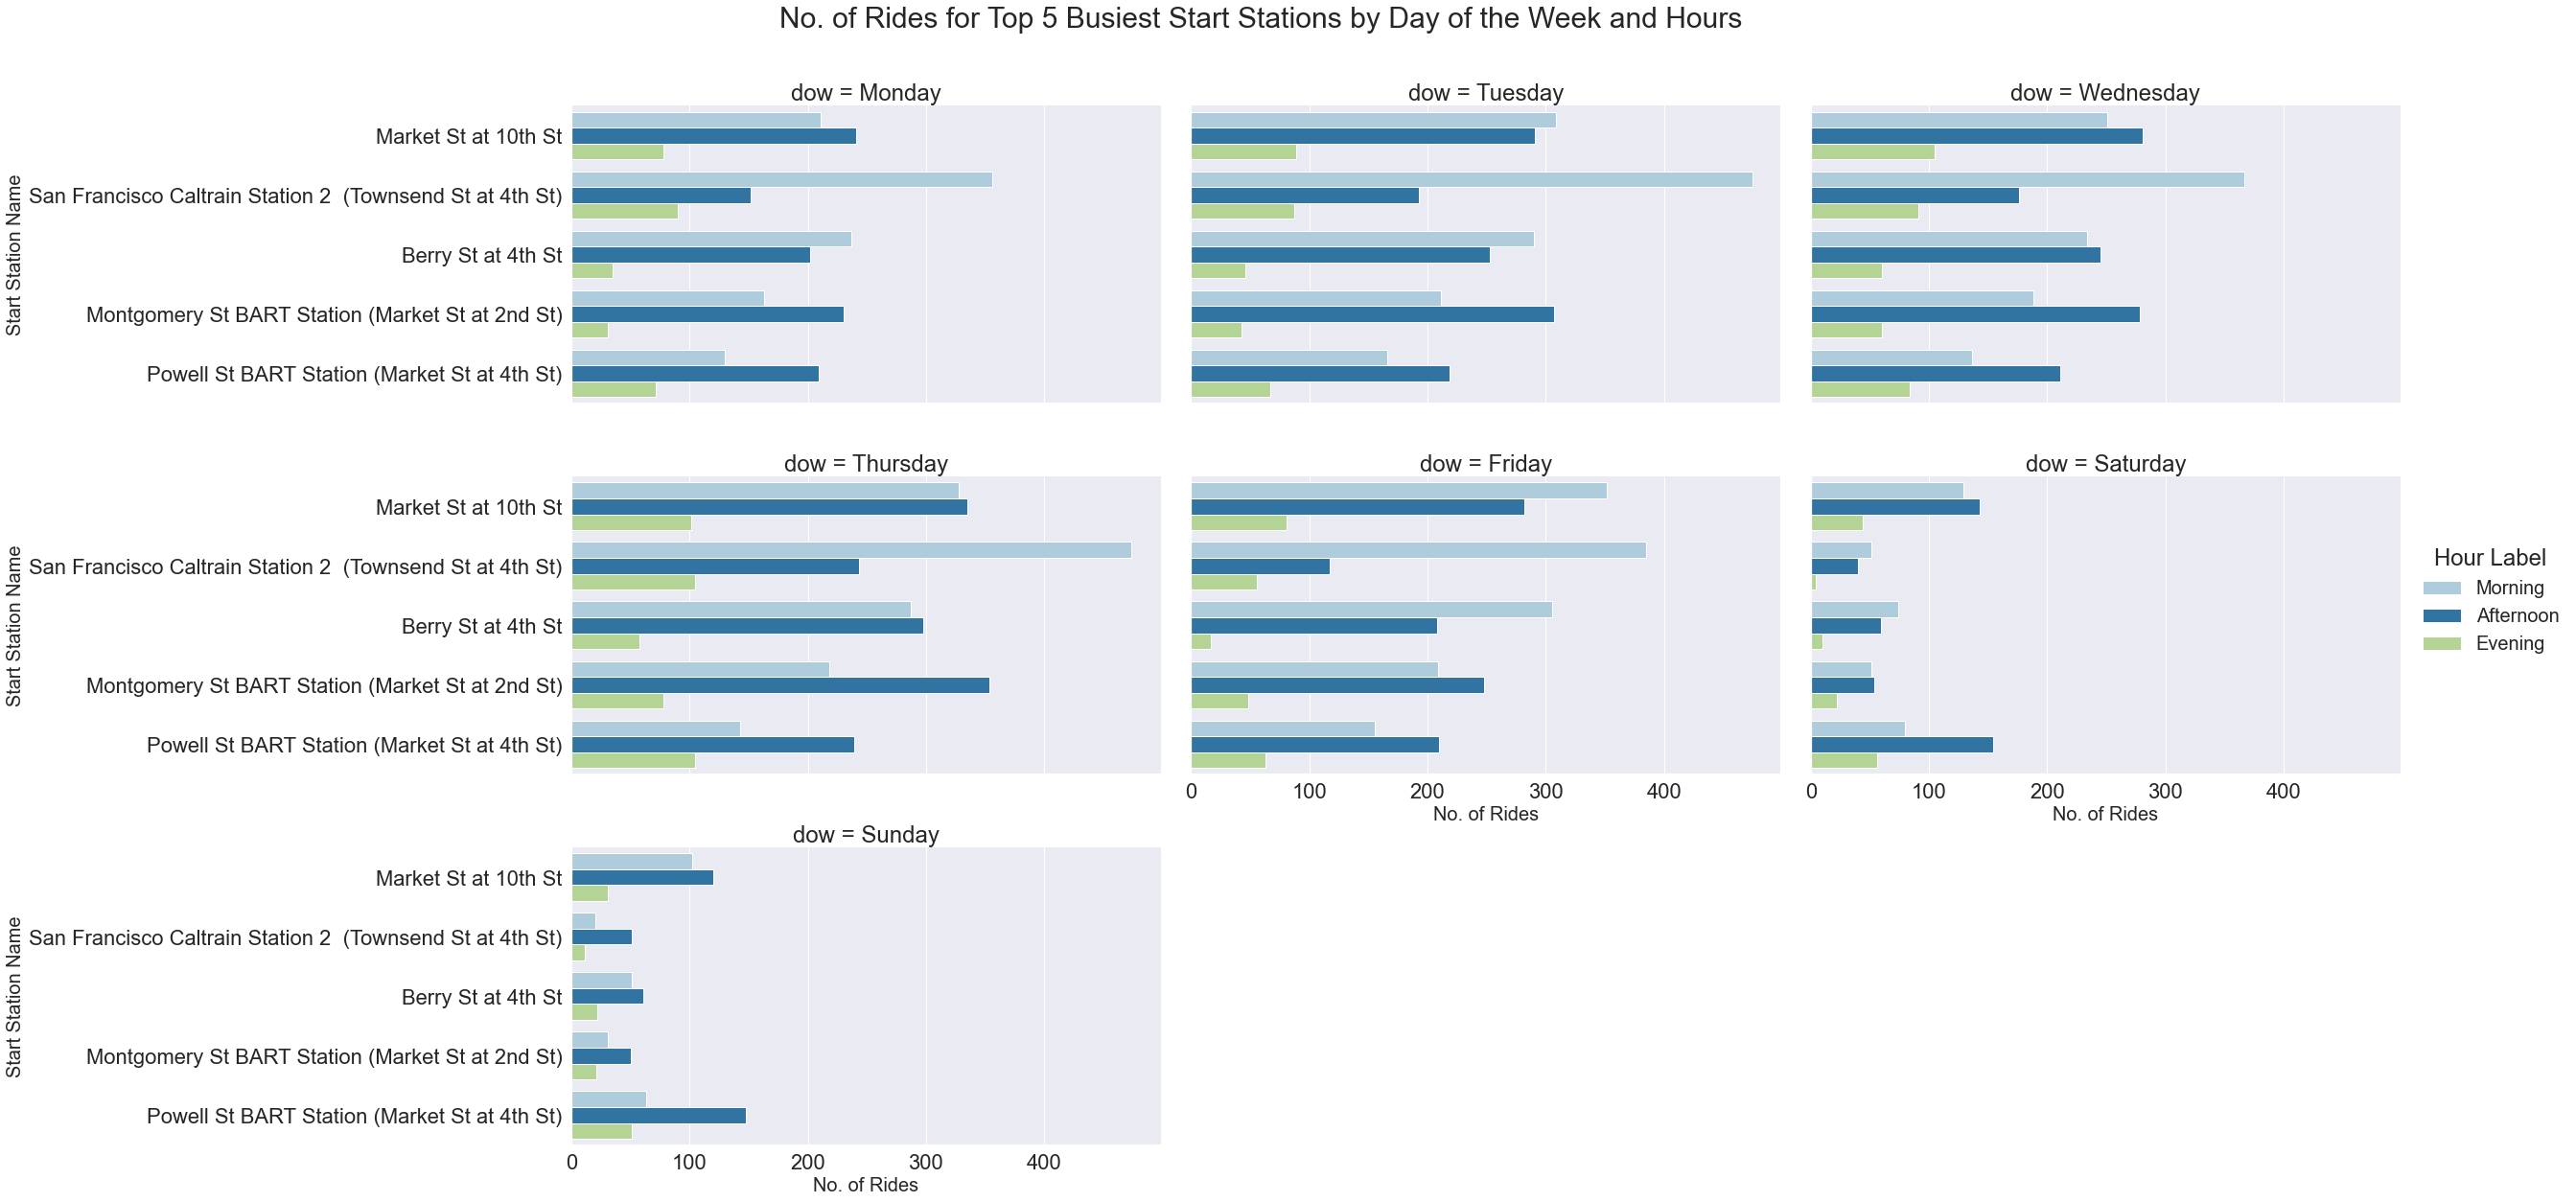

In [7]:
sns.set(font_scale=2)
sns.set_palette('Paired')
g = sns.catplot(data=df, y='start_station_name', col='dow', hue='hour_label', kind='count',
                height=6, aspect=2, col_wrap=3, col_order=ordinal_week, order=start_order, legend=False)

g.add_legend(title='Hour Label', label_order=['Morning', 'Afternoon', 'Evening'], fontsize=20)
g.set_xlabels('No. of Rides', fontsize=20)
g.set_ylabels('Start Station Name', fontsize=20)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('No. of Rides for Top 5 Busiest Start Stations by Day of the Week and Hours', fontsize=30);


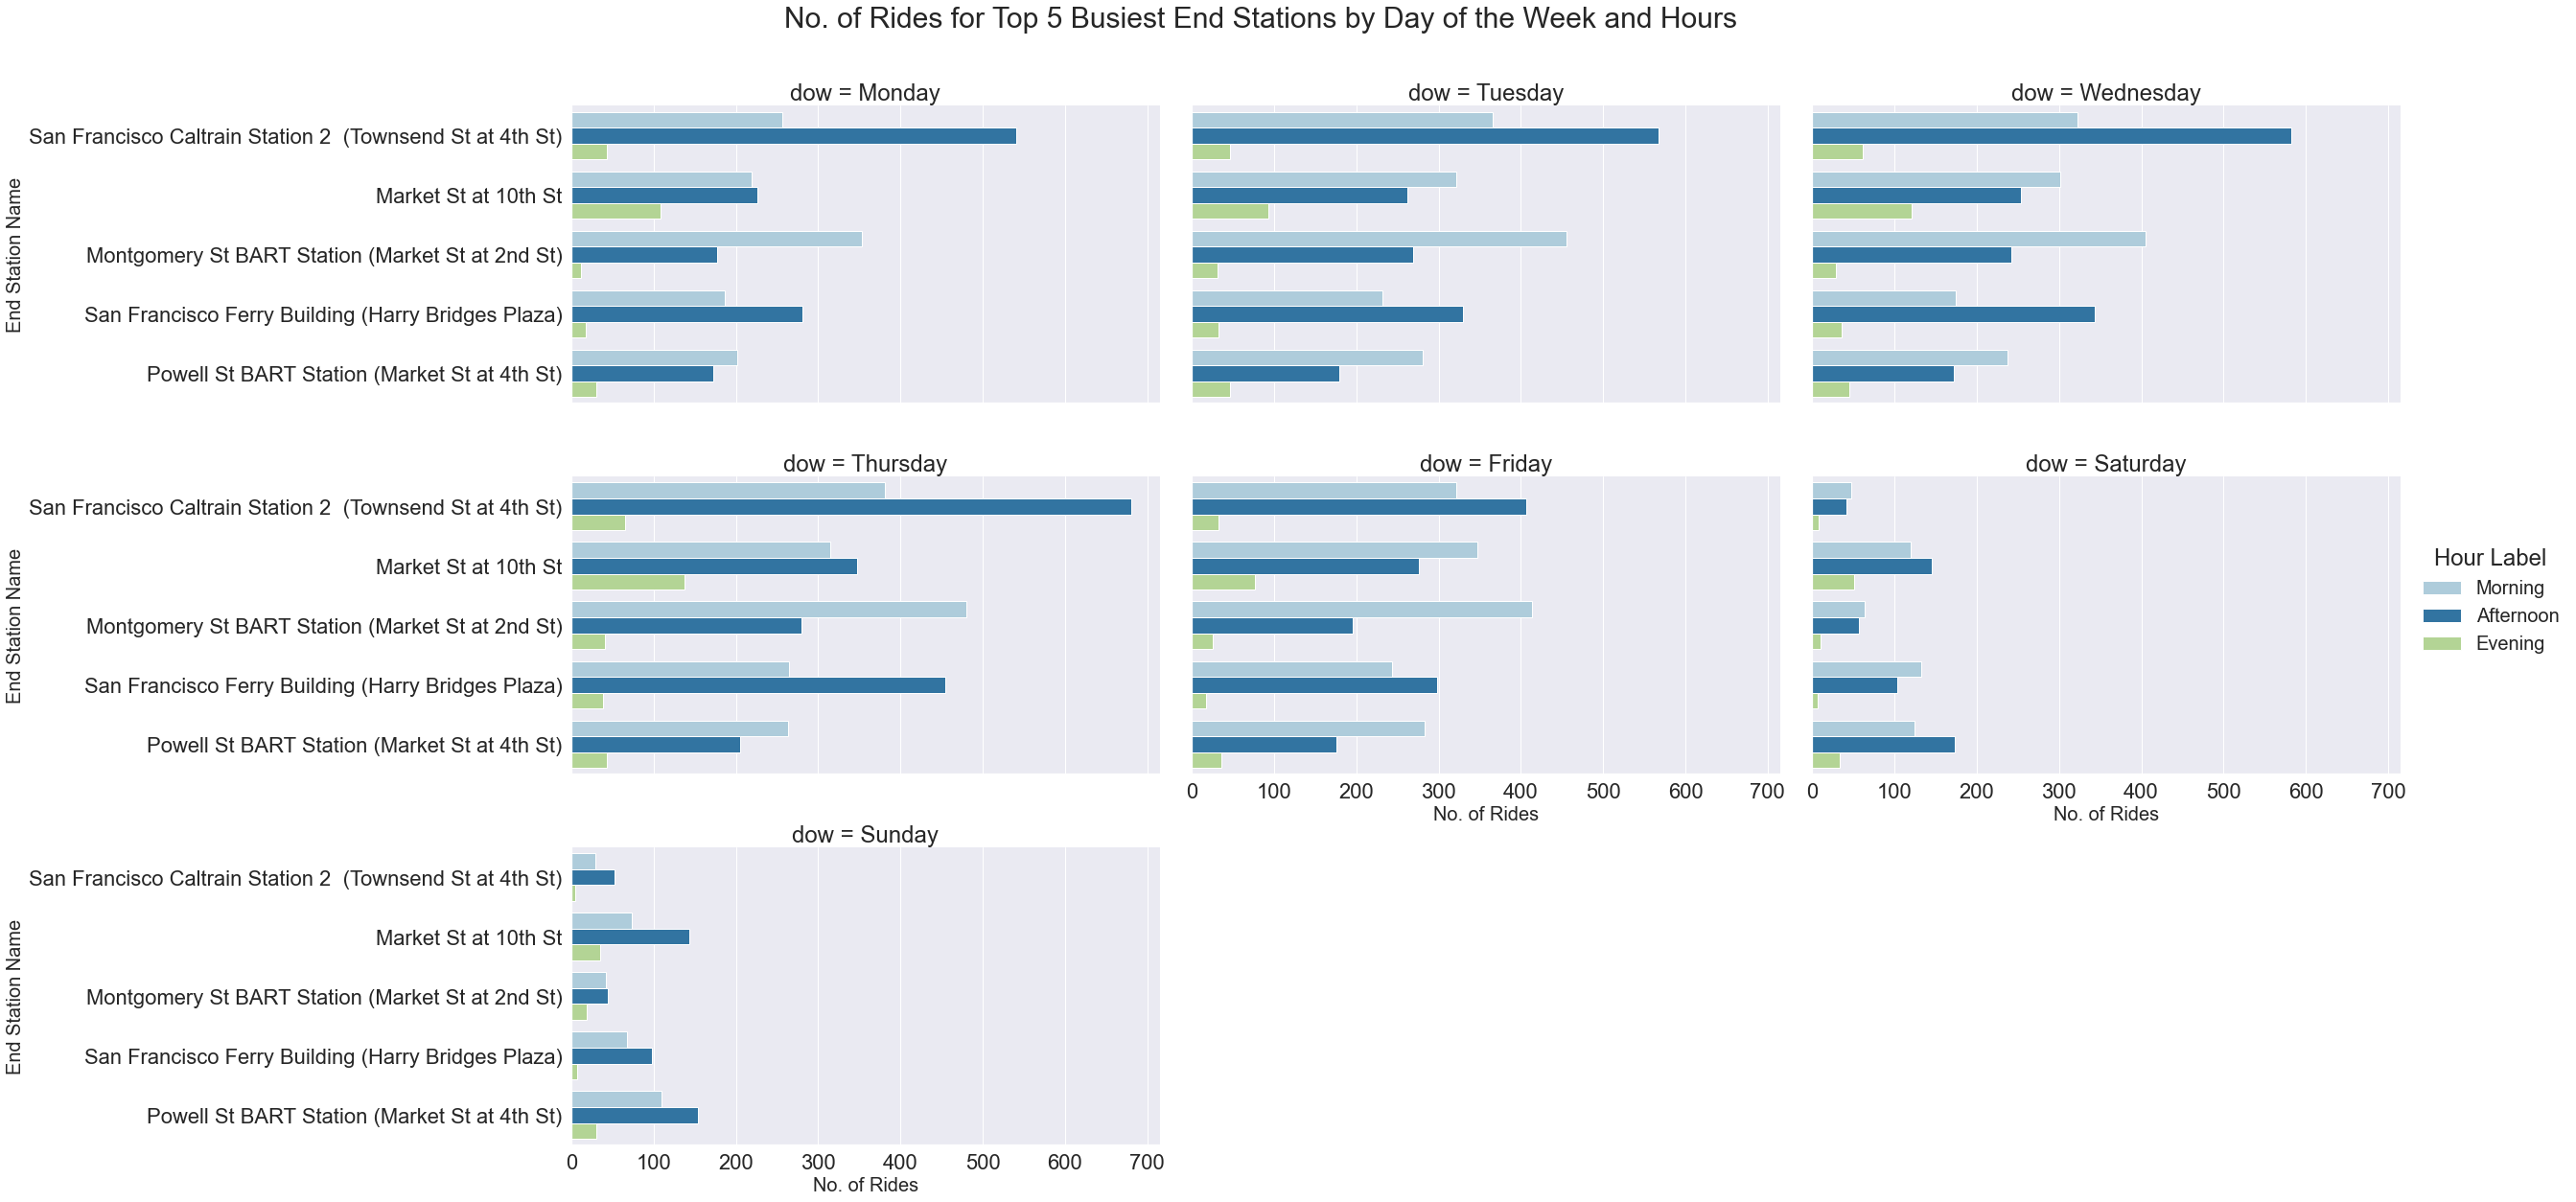

In [8]:
sns.set(font_scale=2)
sns.set_palette('Paired')
g = sns.catplot(data=df, y='end_station_name', col='dow', hue='hour_label', kind='count',
                height=6, aspect=2, col_wrap=3, col_order=ordinal_week, order=end_order, legend=False)

g.add_legend(title='Hour Label', label_order=['Morning', 'Afternoon', 'Evening'], fontsize=20)
g.set_xlabels('No. of Rides', fontsize=20)
g.set_ylabels('End Station Name', fontsize=20)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('No. of Rides for Top 5 Busiest End Stations by Day of the Week and Hours', fontsize=30);

 ## Duration and Distance 

**Duration and Distance Relation**

1. Riding durations and distances are not very much related to member demographics. 

2. The duration and distance are positively linear related. When the values of two variables increase, this relation is affected largely by outliers.


In [9]:
member_info = df[['user_type', 'duration_min', 'distance', 'member_gender', 'member_age']]

# bin edges that will be used to define member age group
bin_edges = [18, 30, 60, 90] 
# labels
bin_names = ['18-30', '31-60', '60+']
pd.options.mode.chained_assignment = None  # default='warn'
member_info['age_group'] = pd.cut(member_info['member_age'], bin_edges, labels=bin_names)

member_dd = member_info.query('distance < 5 and duration_min < 10')
member_dd.head()

,user_type,duration_min,distance,member_gender,member_age,age_group
10,Subscriber,7.63,0.98,Female,23.0,18-30
11,Subscriber,8.43,1.61,Male,26.0,18-30
14,Subscriber,6.58,1.21,Male,31.0,31-60
15,Subscriber,3.47,0.79,Male,26.0,18-30
16,Subscriber,9.13,2.32,Male,38.0,31-60


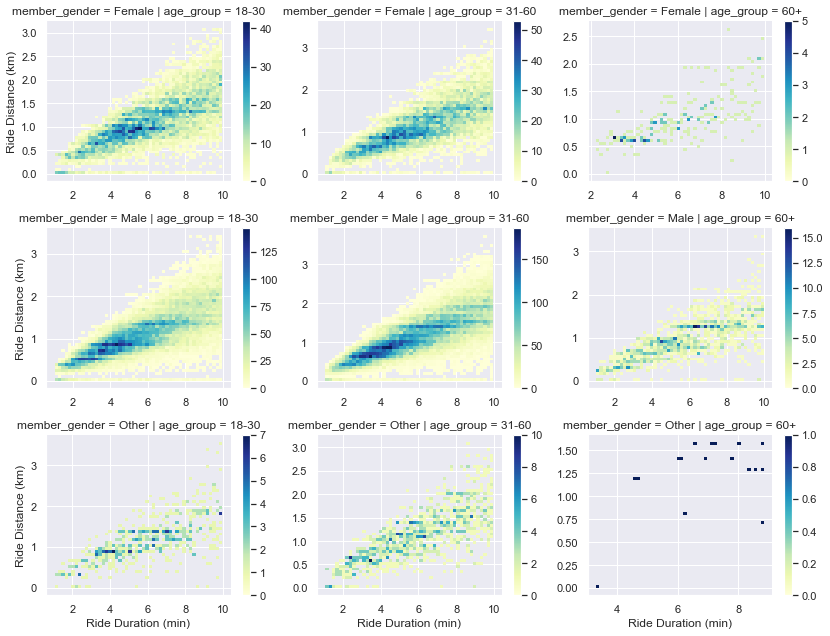

In [10]:
sns.set(font_scale=1)
g = sns.FacetGrid(data=member_dd, col='age_group', row='member_gender',
                   height=3, aspect=1.3, sharey=False, sharex=False)
# g.map_dataframe(sns.scatterplot, x='duration_min', y='distance')
# bins_dur = np.arange(0, 50, 1)
# bins_dis = np.arange(-0.1, 10, 0.1)
g.map_dataframe(sns.histplot, x='duration_min', y='distance', 
#                 bins = [bins_dur, bins_dis],
                bins=50,
                cmap='YlGnBu', cbar=True)

g.set_xlabels('Ride Duration (min)')
g.set_ylabels('Ride Distance (km)');

## Thanks For Watching  :)

In [12]:
!jupyter nbconvert Part_II_slide_deck_FordGoBike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_FordGoBike.ipynb to slides
[NbConvertApp] Writing 1354872 bytes to Part_II_slide_deck_FordGoBike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_FordGoBike.slides.html
Use Control-C to stop this server
^C

Interrupted
